# Test the YOLO model performance based on the size of object and Estimate the Distance of predicted object from camera. 

When a YOLO model is trained on a custom dataset, it saves all the trained model metrics at one place at runs/detect/. like confusion matrix, Precision Curve and F1 graph etc. These metrics are good to measure the training modules of the model. In this file, A python script is introduced to compute the distribution of detection based on bounding box areas. Also, we tried to compute the accuracy and precision of the model based on different object sizes in images and compute histogram as shown. Finally, we also tried to compute the distance of the object from camera based on some extra information        

### Train Custom Model
As the time of writing, the ultralytics has not officialy merged the yolo v10, so currently you have to download the code and model from github and then use the command to train the model.

In [2]:
!yolo task=detect mode=train epochs=100 batch=64 plots=True model=weights/yolov10n.pt data=bdd100k.yaml

New https://pypi.org/project/ultralytics/8.2.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12042MiB)
engine/trainer: task=detect, mode=train, model=weights/yolov10n.pt, data=bdd100k.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

## Predict
To measure the performance based on object sizes, it is necessary to save all the predictions inside label .txt file, For that, you will have to set the save_txt=True. Predictions can be done both o video or a set of images inside a folder.

In [4]:
!yolo task=detect mode=predict conf=0.25 save_conf=True save=True save_txt=True model=runs/detect/train/weights/best.pt source=/home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/Dataset/custom_dataset/test/images/*

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12042MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs

image 1/544 /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/Dataset/custom_dataset/test/images/1028_jpg.rf.056f9866ad30f870e7beeb0ded4b9ada.jpg: 640x640 1 traffic sign, 6.2ms
image 2/544 /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/Dataset/custom_dataset/test/images/10741_jpg.rf.0ad0292d16aff813746b5b2c289e4b91.jpg: 640x640 (no detections), 6.5ms
image 3/544 /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/Dataset/custom_dataset/test/images/11621_jpg.rf.dba4974c11411b038a70e2b0971fe001.jpg: 640x640 (no detections), 5.9ms
image 4/544 /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/Dataset/custom_dataset/test/images/11722_jpg.rf.6a6042f1aa4a71bf40acd89d75d1d1b4.jpg: 640x640 1 traffic sign, 6.2ms
image 5/544 /home/ubaurr/repositorio/traffic_signs/traf

### Prediction on Video

In [4]:
!yolo task=detect mode=predict conf=0.25 save=True model=runs/detect/train/weights/best.pt source=b.mp4

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12042MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs

video 1/1 (frame 1/56) /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/b.mp4: 384x640 2 traffic signs, 63.6ms
video 1/1 (frame 2/56) /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/b.mp4: 384x640 2 traffic signs, 5.5ms
video 1/1 (frame 3/56) /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/b.mp4: 384x640 2 traffic signs, 5.6ms
video 1/1 (frame 4/56) /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/b.mp4: 384x640 2 traffic signs, 5.6ms
video 1/1 (frame 5/56) /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/b.mp4: 384x640 2 traffic signs, 5.5ms
video 1/1 (frame 6/56) /home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/b.mp4: 384x640 2 traffic signs, 5.6ms
video 1/1 (frame 7/56) /home/ub

## Distribution of sizes of Detected Objects
Since the Yolo prediction generates the labels and images with bounding box, we can extract the size of the detected bounding boxes and calculate the total areas of those bounding boxes from width and height. We can then create a Histogram of the distribution of prediction based on the area of predicted Bounding Boxes.

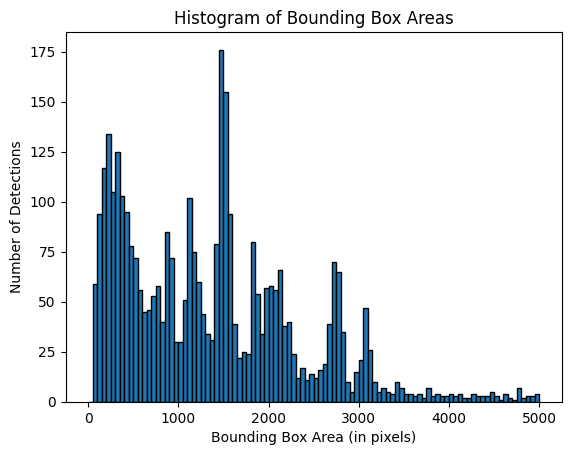

In [20]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def calculate_area(width, height, image_width, image_height):
    """
    Calculate the area of a bounding box in pixels.
    """
    return (width * image_width) * (height * image_height)

def read_labels(file_path, image_width, image_height):
    """
    Read labels from a file and return a list of bounding box areas.
    """
    areas = []
    with open(file_path, 'r') as file:
        for line in file:
            _, x_center, y_center, width, height = map(float, line.strip().split())
            # Calculate area in pixels
            area = calculate_area(width, height, image_width, image_height)
            areas.append(area)
    return areas

def process_folder(label_folder, image_folder):
    """
    Process all label files in the given folder and collect bounding box areas.
    """
    areas = []
    label_files = glob.glob(os.path.join(label_folder, '*.txt'))
    
    for label_file in label_files:
        # Derive the corresponding image file path
        image_file = os.path.join(image_folder, os.path.basename(label_file).replace('.txt', '.jpg'))
        
        # Load the image to get its dimensions
        with Image.open(image_file) as img:
            image_width, image_height = img.size
        
        # Read labels and calculate areas
        areas.extend(read_labels(label_file, image_width, image_height))
        
    return areas

def plot_histogram(areas, bins=100, range=(0, 5000)):
    """
    Plot a histogram of the bounding box areas.
    """
    plt.hist(areas, bins=bins, range=range, edgecolor='black')
    plt.xlabel('Bounding Box Area (in pixels)')
    plt.ylabel('Number of Detections')
    plt.title('Histogram of Bounding Box Areas')
    plt.show()

# Define the folders containing the label files and corresponding images
label_folder = '/home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/runs/detect/labels/'
image_folder = '/home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/runs/detect/predict3/'

# Process the folder to get all bounding box areas
areas = process_folder(label_folder, image_folder)

# Plot the histogram
plot_histogram(areas)


## Measure Accuracy Based on different object sizes
We create histograms that visualize these metrics based on the sizes of detected objects, categorized by their bounding box areas. To achieve this, we use the ground truth labels and the predicted labels, grouping them according to the sizes of the detected objects. Precision, Recall, and Accuracy are then calculated using the respective formulas for true positives, false positives, and false negatives. This approach helps in understanding how the object detection model performs across various scales, which is crucial for applications where object size can significantly influence detection accuracy.

Skipping malformed line: 0 0.5484841687500001 0.534729653125 0.59804740625 0.5282569390625 0.569272540625 0.45768348281250004 0.5484841687500001 0.534729653125

Skipping malformed line: 0 0.41584164843750004 0.561543590625 0.44932479531249997 0.564364709375 0.43385272500000005 0.51273824375 0.41584164843750004 0.561543590625

Skipping malformed line: 0 0.476645240625 0.6361708859374999 0.550532496875 0.628122165625 0.5106913296875 0.5186595640625 0.476645240625 0.6361708859374999

Skipping malformed line: 0 0.6725446359375 0.6983076421875001 0.69634494375 0.6933492453125 0.6814697515625 0.6576487828124999 0.6725446359375 0.6983076421875001

Skipping malformed line: 0 0.721530159375 0.297215675 0.6852336734375 0.4118001390625 0.7609063484374999 0.4078894078125 0.7611263265625 0.40749833437499994 0.721530159375 0.297215675

Skipping malformed line: 0 0.5473498671875 0.49950133125 0.5884568890625 0.49721284062500004 0.5676030140625 0.43679667499999997 0.5473498671875 0.49950133125

Skippi

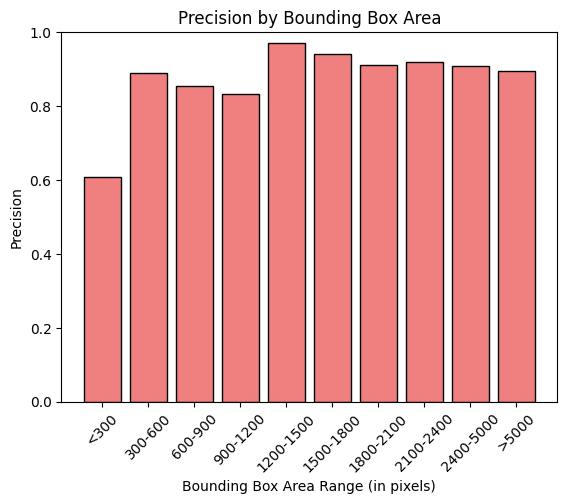

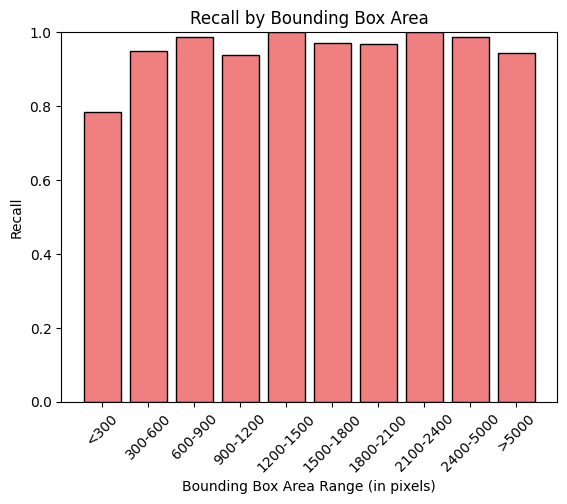

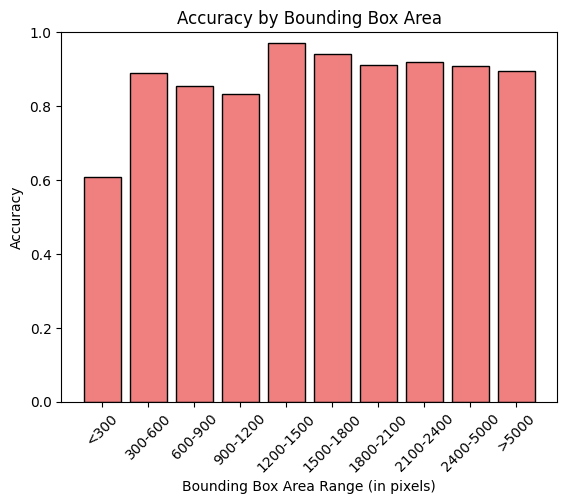

Total skipped malformed lines: 10


In [1]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_area(width, height, image_width, image_height):
    return (width * image_width) * (height * image_height)

def calculate_iou(box1, box2):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2
    
    x_inter_min = max(x1_min, x2_min)
    y_inter_min = max(y1_min, y2_min)
    x_inter_max = min(x1_max, x2_max)
    y_inter_max = min(y1_max, y2_max)
    
    inter_area = max(0, x_inter_max - x_inter_min) * max(0, y_inter_max - y_inter_min)
    
    area_box1 = (x1_max - x1_min) * (y1_max - y1_min)
    area_box2 = (x2_max - x2_min) * (y2_max - y2_min)
    
    union_area = area_box1 + area_box2 - inter_area
    
    iou = inter_area / union_area if union_area != 0 else 0
    return iou

def read_labels(file_path, image_width, image_height):
    boxes = []
    areas = []
    skipped_lines = 0
    
    with open(file_path, 'r') as file:
        for line in file:
            values = list(map(float, line.strip().split()))
            
            if len(values) >= 5:
                _, x_center, y_center, width, height = values[:5]
                confidence = values[5] if len(values) == 6 else None
                
                box_width = width * image_width
                box_height = height * image_height
                x_min = (x_center - width / 2) * image_width
                y_min = (y_center - height / 2) * image_height
                x_max = x_min + box_width
                y_max = y_min + box_height
                
                boxes.append([x_min, y_min, x_max, y_max, confidence])
                area = calculate_area(width, height, image_width, image_height)
                areas.append(area)
            else:
                skipped_lines += 1
                print(f"Skipping malformed line: {line}")
                
    return boxes, areas, skipped_lines

def read_ground_truth(gt_file_path, image_width, image_height):
    gt_boxes = []
    skipped_lines = 0
    
    with open(gt_file_path, 'r') as file:
        for line in file:
            values = list(map(float, line.strip().split()))
            if len(values) == 5:
                _, x_center, y_center, width, height = values[:5]
                
                box_width = width * image_width
                box_height = height * image_height
                x_min = (x_center - width / 2) * image_width
                y_min = (y_center - height / 2) * image_height
                x_max = x_min + box_width
                y_max = y_min + box_height
                
                gt_boxes.append([x_min, y_min, x_max, y_max])
            else:
                skipped_lines += 1
                print(f"Skipping malformed line: {line}")
                
    return gt_boxes, skipped_lines

def calculate_recall_by_area(true_positives_by_area, false_negatives_by_area):
    recall_by_area = {}
    for bin_key in true_positives_by_area:
        tp = true_positives_by_area[bin_key]
        fn = false_negatives_by_area[bin_key]
        if tp + fn > 0:
            recall_by_area[bin_key] = tp / (tp + fn)
        else:
            recall_by_area[bin_key] = 0
    return recall_by_area

def calculate_accuracy_by_area(true_positives_by_area, false_positives_by_area, false_negatives_by_area, total_detections_by_area):
    accuracy_by_area = {}
    for bin_key in total_detections_by_area:
        tp = true_positives_by_area[bin_key]
        fp = false_positives_by_area[bin_key]
        fn = false_negatives_by_area[bin_key]
        total = tp + fp + fn
        if total > 0:
            accuracy_by_area[bin_key] = tp / total
        else:
            accuracy_by_area[bin_key] = 0
    return accuracy_by_area

def calculate_metrics_by_area(label_folder, image_folder, gt_folder, iou_threshold=0.5, decimal_tolerance=3, area_ranges=[1000, 2000, 3000, 4000, 5000]):
    total_detections_by_area = defaultdict(int)
    true_positives_by_area = defaultdict(int)
    false_positives_by_area = defaultdict(int)
    false_negatives_by_area = defaultdict(int)
    total_skipped_lines = 0
    
    area_bins = {f"<{area_ranges[0]}": 0}
    for i in range(len(area_ranges) - 1):
        area_bins[f"{area_ranges[i]}-{area_ranges[i+1]}"] = 0
    area_bins[f">{area_ranges[-1]}"] = 0
    
    label_files = glob.glob(os.path.join(label_folder, '*.txt'))
    
    for label_file in label_files:
        image_file = os.path.join(image_folder, os.path.basename(label_file).replace('.txt', '.jpg'))
        gt_file = os.path.join(gt_folder, os.path.basename(label_file))
        
        with Image.open(image_file) as img:
            image_width, image_height = img.size
        
        detected_boxes, detected_areas, skipped_labels = read_labels(label_file, image_width, image_height)
        ground_truth_boxes, skipped_gt = read_ground_truth(gt_file, image_width, image_height)
        
        total_skipped_lines += skipped_labels + skipped_gt
        
        matched_gt_indices = set()
        
        for detected_box, detected_area in zip(detected_boxes, detected_areas):
            x_min, y_min, x_max, y_max, confidence = detected_box
            best_iou = 0
            best_gt_idx = -1
            
            for gt_idx, gt_box in enumerate(ground_truth_boxes):
                iou = calculate_iou([x_min, y_min, x_max, y_max], gt_box)
                if iou > best_iou:
                    best_iou = iou
                    best_gt_idx = gt_idx
            
            bin_key = None
            for i in range(len(area_ranges)):
                if detected_area < area_ranges[i]:
                    if i == 0:
                        bin_key = f"<{area_ranges[0]}"
                    else:
                        bin_key = f"{area_ranges[i-1]}-{area_ranges[i]}"
                    break
            if bin_key is None:
                bin_key = f">{area_ranges[-1]}"
                
            total_detections_by_area[bin_key] += 1
            
            if best_iou >= iou_threshold:
                true_positives_by_area[bin_key] += 1
                matched_gt_indices.add(best_gt_idx)
            else:
                false_positives_by_area[bin_key] += 1
        
        for gt_idx, gt_box in enumerate(ground_truth_boxes):
            if gt_idx not in matched_gt_indices:
                gt_area = calculate_area((gt_box[2] - gt_box[0]) / image_width, 
                                         (gt_box[3] - gt_box[1]) / image_height, 
                                         image_width, image_height)
                
                bin_key = None
                for i in range(len(area_ranges)):
                    if gt_area < area_ranges[i]:
                        if i == 0:
                            bin_key = f"<{area_ranges[0]}"
                        else:
                            bin_key = f"{area_ranges[i-1]}-{area_ranges[i]}"
                        break
                if bin_key is None:
                    bin_key = f">{area_ranges[-1]}"
                    
                false_negatives_by_area[bin_key] += 1
    
    precision_by_area = {}
    for bin_key in total_detections_by_area:
        tp = true_positives_by_area[bin_key]
        fp = false_positives_by_area[bin_key]
        fn = false_negatives_by_area[bin_key]
        
        if tp + fp + fn > 0:
            precision_by_area[bin_key] = tp / (tp + fp + fn)
        else:
            precision_by_area[bin_key] = 0

    recall_by_area = calculate_recall_by_area(true_positives_by_area, false_negatives_by_area)
    accuracy_by_area = calculate_accuracy_by_area(true_positives_by_area, false_positives_by_area, false_negatives_by_area, total_detections_by_area)
    
    return precision_by_area, recall_by_area, accuracy_by_area, total_skipped_lines

def plot_histogram(data, title, xlabel, ylabel):
    def sort_key(bin_key):
        if bin_key.startswith('<'):
            return float(bin_key[1:]) - 0.1  # Ensures '<300' comes before '300-600'
        elif bin_key.startswith('>'):
            return float(bin_key[1:]) + 0.1  # Ensures '>5000' comes after '2400-5000'
        else:
            # Split range and take the lower bound as the sorting key
            return float(bin_key.split('-')[0])
    
    # Extract and sort bins and values
    sorted_bins = sorted(data.keys(), key=sort_key)
    sorted_values = [data[bin_key] for bin_key in sorted_bins]
    
    # Plot histogram
    plt.bar(sorted_bins, sorted_values, color='lightcoral', edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylim([0, 1])
    plt.show()

# Define the folders containing the label files, corresponding images, and ground truth labels
label_folder = '/home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/runs/detect/labels/'
image_folder = '/home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/yolov10/runs/detect/predict2/'
gt_folder = '/home/ubaurr/repositorio/traffic_signs/traffic_env/Detection/Dataset/custom_dataset/test/labels/'

# Define the area ranges you want to evaluate precision for
area_ranges = [300, 600, 900, 1200, 1500, 1800, 2100, 2400, 5000]

# Calculate metrics by area and count skipped lines
precision_by_area, recall_by_area, accuracy_by_area, total_skipped_lines = calculate_metrics_by_area(label_folder, image_folder, gt_folder, area_ranges=area_ranges)

# Plot precision, recall, and accuracy by area
plot_histogram(precision_by_area, 'Precision by Bounding Box Area', 'Bounding Box Area Range (in pixels)', 'Precision')
plot_histogram(recall_by_area, 'Recall by Bounding Box Area', 'Bounding Box Area Range (in pixels)', 'Recall')
plot_histogram(accuracy_by_area, 'Accuracy by Bounding Box Area', 'Bounding Box Area Range (in pixels)', 'Accuracy')

print(f"Total skipped malformed lines: {total_skipped_lines}")

## Calculate Distance
To Calculate Distance, We require additional data of camera focal lenght as well as the conventional size of object in real world, if your target object has different sizes in real world then this might be a problem.

In [ ]:
import os

def calculate_distance(label_file, image_width, image_height, object_real_height, focal_length):
    """
    Calculate the distance of the detected object from the camera.
    
    Parameters:
        label_file (str): Path to the YOLO label file.
        image_width (int): Width of the image in pixels.
        image_height (int): Height of the image in pixels.
        object_real_height (float): Real height of the object in centimeters.
        focal_length (float): Focal length of the camera in pixels.
        
    Returns:
        float: Estimated distance from the camera in centimeters.
    """
    
    # Read the label file
    with open(label_file, 'r') as f:
        lines = f.readlines()

    # Assuming we want to calculate the distance for the first bounding box
    label = lines[0].strip().split()
    _, x_center, y_center, bbox_width, bbox_height = map(float, label)
    
    # Convert bbox width and height from fractions to pixels
    bbox_width_px = bbox_width * image_width
    bbox_height_px = bbox_height * image_height
    
    # Calculate the distance
    distance = (object_real_height * focal_length) / bbox_height_px
    
    return distance

# Get user inputs
label_folder = input("Enter the path to the label folder: ")
image_width = int(input("Enter the image width in pixels: "))
image_height = int(input("Enter the image height in pixels: "))
object_real_height = float(input("Enter the real height of the object in centimeters: "))
focal_length = float(input("Enter the camera's focal length in pixels: "))
    
# Iterate through label files in the folder
for label_file in os.listdir(label_folder):
    if label_file.endswith(".txt"):
        label_file_path = os.path.join(label_folder, label_file)
        distance = calculate_distance(label_file_path, image_width, image_height, object_real_height, focal_length)
        print(f"Distance for {label_file}: {distance:.2f} cm")

